In [13]:
import pandas as pd
import yfinance as yf                   #Importing the libraries i am going to need.
import matplotlib.pyplot as plt
import talib
import seaborn as sns

In [14]:
stocks = ['SPY', 'AAPL', 'NVDA', 'TSLA', 'GOOG', 'AMZN']
df = yf.download(stocks, start =  "2020-02-12", end = "2025-02-12")['Close']              # Downloading 5 years history of these 6 stocks

[*********************100%***********************]  6 of 6 completed


In [15]:
df.to_csv("Stocks 5 years history.csv")

In [16]:

df = df.reset_index()  
df.set_index('Date', inplace=True)                #Dropping the index and setting back the Date as the index because i was getting errors due to multi-index format.      
calc_df = df.copy()
for stock in stocks:
    calc_df[f'{stock}_Volume'] = yf.download(stock, start =  "2020-02-12", end = "2025-02-12")['Volume']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
for stock in df.columns:
    calc_df[f'{stock}_MA20'] = df[stock].rolling(window=20).mean()
    calc_df[f'{stock}_MA50'] = df[stock].rolling(window=50).mean()             #Caluclating the moving average of different windows.
    calc_df[f'{stock}_MA200'] = df[stock].rolling(window=200).mean()

In [18]:
for stock in df.columns:
    calc_df[f'{stock}_STD'] = df[stock].rolling(window=20).std()                 #Upper and Lower Bands indicate the standard deviation-based price range relative to the moving average, showing volatility."
    if f'{stock}_MA20' in calc_df.columns:
        calc_df[f'{stock}_Upper_Band'] = calc_df[f'{stock}_MA20'] + (calc_df[f'{stock}_STD'] * 2)             #Calculating the Bolinger Bands allows us to see the volatility of the stocks. They show the standard deviation based price range relative to the moving average
        calc_df[f'{stock}_Lower_Band'] = calc_df[f'{stock}_MA20'] - (calc_df[f'{stock}_STD'] * 2)

In [19]:

for stock in df.columns:
    calc_df[f'{stock}_RSI'] = talib.RSI(df[stock].values, timeperiod=14)            # Calculating the Relative Strength Index( RSI ) that shows overbought and oversold positions.
    

In [20]:
for stock in df.columns:
    calc_df[f'{stock}_Daily_Returns'] = df[stock].pct_change()                # Calculating the daily return.

In [36]:
calc_df.to_csv("Calculations.csv")        # Saving the dataframe with the calculations as a csv file that i will later need to load to Power BI for more visualizations.

In [22]:



def plot_RSI(stocks):
    fig, ax = plt.subplots(2, 3, figsize=(18, 10),)   # I am plotting the figures of the plots, on a 2x3 array so they are easier readable.
    ax = ax.flatten()                               #Reshaping the 2D array into 1D so that i won't need to do nested loops.

    for i, stock in enumerate(stocks):                   # enumerate saves me from needing to loop through both index and value on each line of the plot.
        ax[i].plot(calc_df.index, calc_df[f"{stock}_RSI"], label=f"{stock} RSI", color='blue', linewidth=0.8)
        ax[i].set_ylim(0, 100)
        ax[i].axhline(y=70, color='r', linestyle='-')
        ax[i].axhline(y=30, color='g', linestyle='-')                                                               
        ax[i].set_title(f"RSI for {stock}", weight='bold', bbox = dict(facecolor='white', edgecolor='black'))                 #Plotting everything needed to show the overbought and oversold positions
        ax[i].set_xlabel("Date", fontsize=10)
        ax[i].set_ylabel("RSI Value", fontsize=10)
        ax[i].legend(fancybox=True, shadow=True)

    
    plt.tight_layout(pad=3.0)          # That gives adequate spacing between the subplots.
    plt.show()


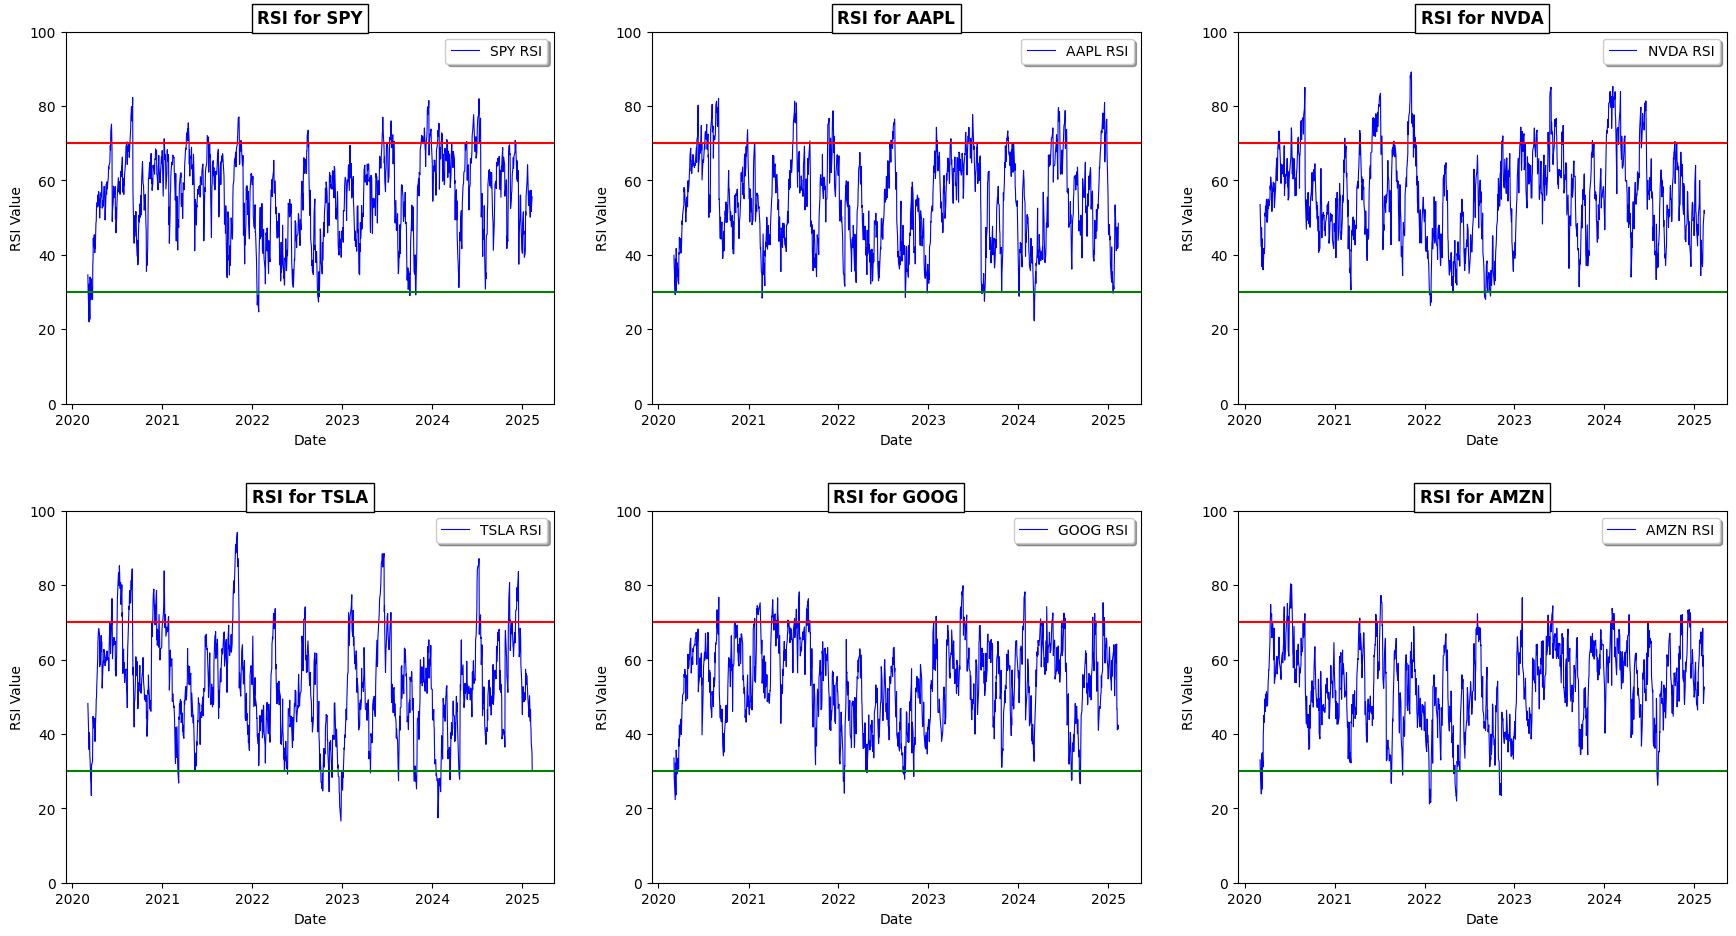

In [23]:
stocks = ['SPY', 'AAPL', 'NVDA', 'TSLA', 'GOOG', 'AMZN']
plot_RSI(stocks)

In [24]:
# We can see that Tesla stock had the highest volatility which is shown by the highs above the red line as well as that it had the lowest lows compared to the other stocks.
# Amazon had the biggest amount of oversold positions, though not as low as the 2 biggest lows of Tesla.
# The other stocks generally stay inside the 30-70 range which means they avoid extreme movements.

In [25]:
def plot_daily_returns(stocks, spy_col):
    fig, ax = plt.subplots(2, 3, figsize=(18, 12)) 
    ax = ax.flatten()  

    for i, stock in enumerate(stocks):
        ax[i].hist(calc_df[f"{stock}_Daily_Returns"], bins=50, alpha=0.6, label=stock, color='blue')
        ax[i].hist(calc_df[spy_col], bins=50, alpha=0.6, label='SPY', color='red')
        
        ax[i].set_title(f"Daily Returns: {stock} vs SPY", fontsize=12, fontweight='bold')
        ax[i].set_xlabel("Daily Return", fontsize=10)
        ax[i].set_ylabel("Frequency", fontsize=10)
        ax[i].set_xlim(-0.2, 0.2)
        ax[i].legend()

    # Adjust spacing
    plt.subplots_adjust(wspace=0.3, hspace=0.4)  
    plt.show()
    

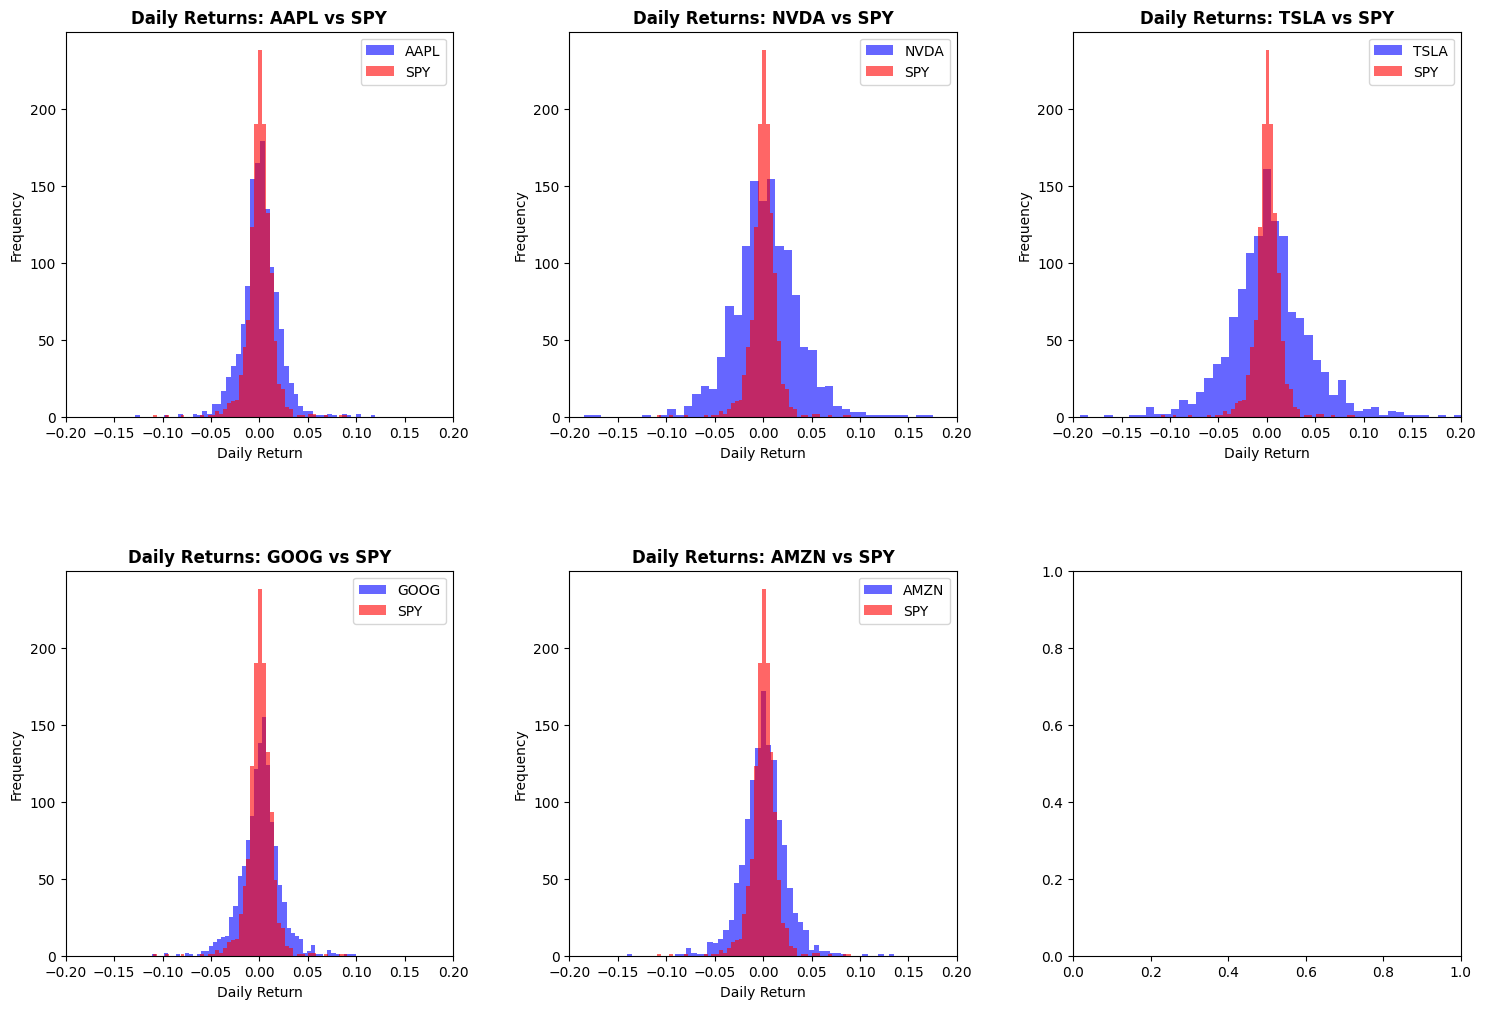

In [26]:
stocks_nospy= ['AAPL', 'NVDA', 'TSLA', 'GOOG', 'AMZN']
plot_daily_returns(stocks_nospy, 'SPY_Daily_Returns')

In [27]:
# The hisograms show the daily returns of the stocks in comparison with SPY which is an ETF of S&P 500 which reflects the market.
# Tesla is again showing the highest volatility shown by the wider distribution compared to the other stocks, followed by NVDA.
# SPY has the narrowest distribution = least volatility.
# The other 3 stocks are generally concentrated close to the 0 mark, without many extreme gains or losses.

In [28]:

matrix = df.corr(method='pearson')
matrix.to_csv("Correlation.csv")

In [29]:
def plot_corr():
    plt.figure(figsize=(12,8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt= ".2f")
    plt.title("Stock Correlation Heatmap", fontsize=14, fontweight="bold")

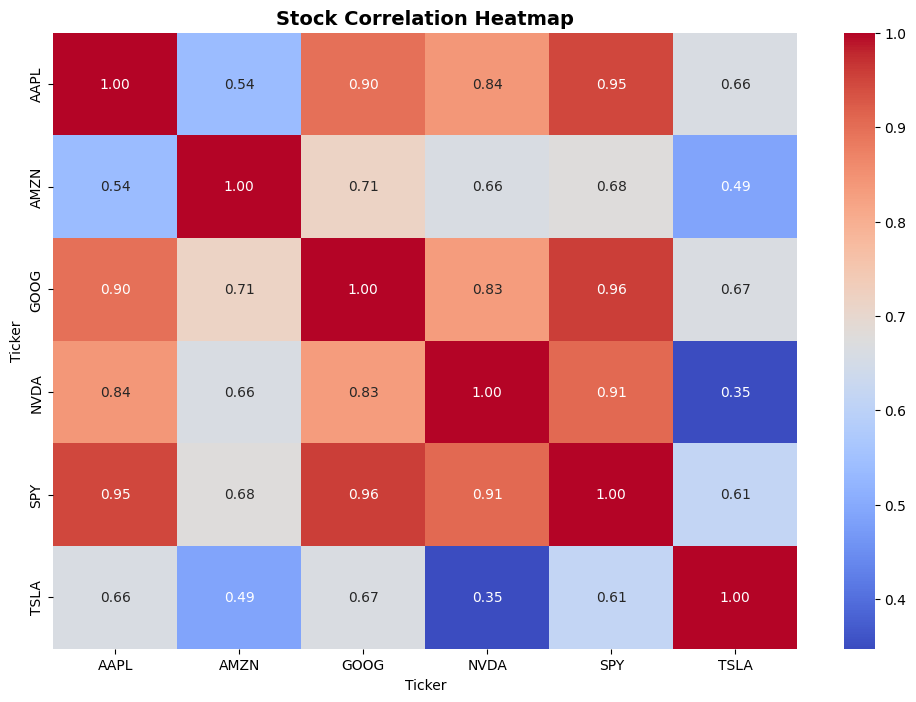

In [30]:
plot_corr()

In [31]:
# The correlation heatmap shows us how the prices of each stock correlates to the others with values closer to 1 indicating a high correlation.
# Tesla shows the lowest correlation to the rest of the stocks which means its price moves more independently.
# Google and Apple have the highest correlation with SPY , 0.96 and 0.95 respectively which suggests that their prices move extremely close to each other.
# Apple, Google, NVDA show a high correlation to each other ( 0.83 - 0.95) suggesting that they move closely together, being very strong companies in the tech sector.
# Amazon shows a middle correlation ( 0.54 - 0.51 ) showing that it is influenced by a variety of factors and does not follow SPY as close as some other stocks.